# Wave Equation  
reference:   
波動方程式の数値解法 - Quiita  
https://qiita.com/kohga/items/dccf135b0af395f69144

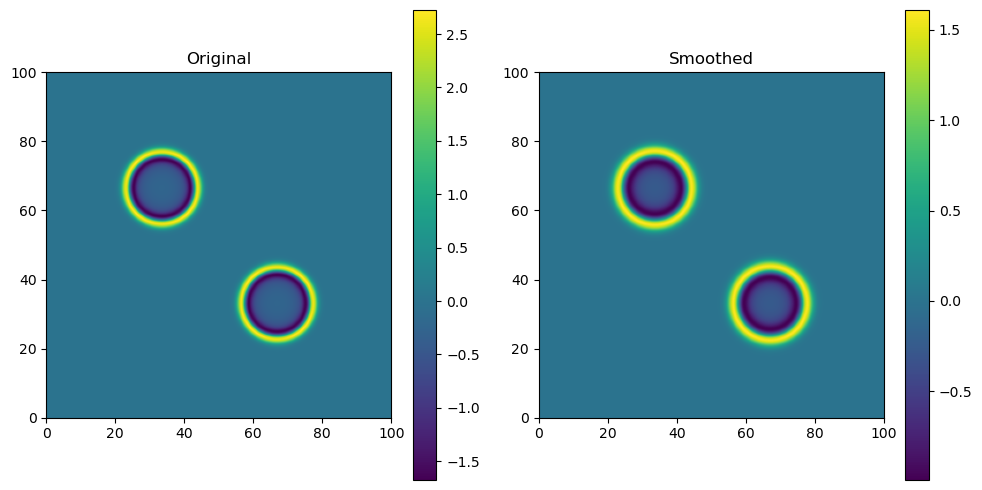

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

class WaveSolver:
    def __init__(self):
        self.kWaveGrid = 300
        self.kWaveWidth = 100
        self._u_cur = np.zeros((self.kWaveGrid, self.kWaveGrid))
        self._u_new = np.zeros((self.kWaveGrid, self.kWaveGrid))
        self._u_pre = np.zeros((self.kWaveGrid, self.kWaveGrid))
        self.reset()

    def reset(self):
        def gauss(x, sigma):
            return 1.0 / np.sqrt(2 * np.pi) * sigma * np.exp(-x * x / (2.0 * sigma * sigma))

        cx1, cy1 = self.kWaveGrid // 3, self.kWaveGrid // 3
        cx2, cy2 = self.kWaveGrid * 2 // 3, self.kWaveGrid * 2 // 3

        for x in range(1, self.kWaveGrid - 1):
            for y in range(1, self.kWaveGrid - 1):
                norm1 = np.linalg.norm(np.array([x, y]) - np.array([cx1, cy1]))
                value1 = gauss(norm1, 3.0) * 20.0

                norm2 = np.linalg.norm(np.array([x, y]) - np.array([cx2, cy2]))
                value2 = gauss(norm2, 3.0) * 20.0

                self._u_cur[x, y] = value1 + value2

        self._u_pre[:] = self._u_new[:] = self._u_cur[:]

    def step(self):
        deltaX = float(self.kWaveWidth) / float(self.kWaveGrid)
        deltaT = 1.0 / 60.0
        c = 2.0
        mul = deltaT * deltaT * c * c / (deltaX * deltaX)

        for x in range(1, self.kWaveGrid - 1):
            for y in range(1, self.kWaveGrid - 1):
                uL = self._u_cur[x - 1, y]
                uR = self._u_cur[x + 1, y]
                uT = self._u_cur[x, y - 1]
                uB = self._u_cur[x, y + 1]

                u_pre = self._u_pre[x, y]
                u = self._u_cur[x, y]
                self._u_new[x, y] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB)

        self._u_pre, self._u_cur, self._u_new = self._u_cur, self._u_new, self._u_pre

    def value(self, x, y):
        return self._u_cur[x, y]

    def widthN(self):
        return self.kWaveGrid

    def heightN(self):
        return self.kWaveGrid

    def width(self):
        return self.kWaveWidth

    def height(self):
        return self.kWaveWidth

# Create an instance of the WaveSolver class
wave_solver = WaveSolver()

# Simulation loop
for i in range(300):
    wave_solver.step()

# Create a smoothed image for visualization
smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)

# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.width(), 0, wave_solver.height()])
plt.title('Original')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.width(), 0, wave_solver.height()])
plt.title('Smoothed')
plt.colorbar()

plt.tight_layout()
plt.show()

ssh-keygen -t ed25519 -C "ban.apa0610@gmail.com"



In [2]:
print("Hello World!")


Hello World!
